# DDoS Attack Detection and Logging
This notebook simulates the detection of DDoS attacks and logs events into a CSV file.

## Importing Required Libraries


In [1]:
import pandas as pd  # Importing the pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from datetime import datetime  # Importing datetime for handling date and time

# Read Attack Logs from the CSV File
logs = pd.read_csv('ddos_attack_logs.csv')  # Reading the CSV file containing attack logs
logs['Timestamp'] = pd.to_datetime(logs['Timestamp'])  # Converting the 'Timestamp' column to datetime format
logs.head()  # Displaying the first 5 rows of the logs to get a quick overview

,Timestamp,Source_IP,Destination_IP,Attack_Type,Packet_Size
0,2024-10-18 16:28:44,4.251.110.94,192.168.1.34,ICMP-PoD PACKET,1472
1,2024-10-18 16:28:44,216.49.47.157,192.168.1.34,ICMP-PoD PACKET,1472
2,2024-10-18 16:28:44,13.32.23.201,192.168.1.34,ICMP-PoD PACKET,1472
3,2024-10-18 16:28:44,207.45.24.177,192.168.1.34,ICMP-PoD PACKET,1472
4,2024-10-18 16:28:44,133.249.146.43,192.168.1.34,ICMP-PoD PACKET,1472


## Visualization of Detected Attack Types
This section will display a graph of the types of attacks detected over time.

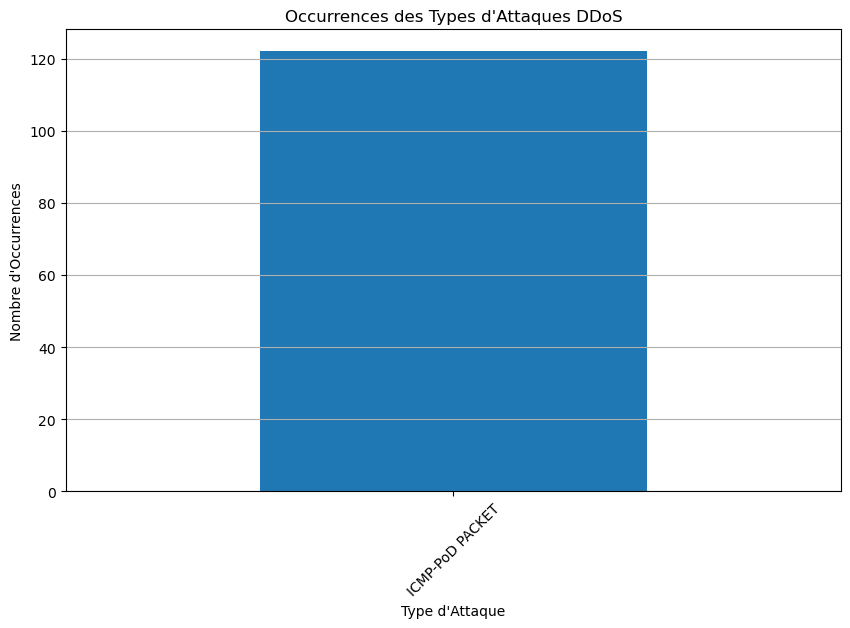

In [2]:
# Counting the occurrences of each type of attack
attack_counts = logs['Attack_Type'].value_counts()  # Counting how many times each attack type appears in the logs

# Displaying the graph
plt.figure(figsize=(10, 6))  # Setting the size of the figure for the plot
attack_counts.plot(kind='bar')  # Creating a bar chart for the attack counts
plt.title('Occurrences des Types d\'Attaques DDoS')  # Adding a title to the graph
plt.xlabel('Type d\'Attaque')  # Labeling the x-axis
plt.ylabel('Nombre d\'Occurrences')  # Labeling the y-axis
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.grid(axis='y')  # Adding a grid to the y-axis for easier interpretation
plt.show()  # Displaying the plot

## Attack Analysis
This section will analyze the attacks and provide insights into their frequency and type.

In [3]:
# Additional analysis, such as the time between attacks
logs['Time_Diff'] = logs['Timestamp'].diff().dt.total_seconds()  # Calculating the time difference between consecutive attacks in seconds

# Displaying the results
logs[['Timestamp', 'Attack_Type', 'Time_Diff']].dropna().head()  # Showing the first few rows of the logs with the timestamp, attack type, and time difference, excluding any rows with missing values

,Timestamp,Attack_Type,Time_Diff
1,2024-10-18 16:28:44,ICMP-PoD PACKET,0.0
2,2024-10-18 16:28:44,ICMP-PoD PACKET,0.0
3,2024-10-18 16:28:44,ICMP-PoD PACKET,0.0
4,2024-10-18 16:28:44,ICMP-PoD PACKET,0.0
5,2024-10-18 16:28:44,ICMP-PoD PACKET,0.0


## IP Address Localization
We will use the ip-api.com API to locate the IP addresses of the attackers and display this information on a map.

In [4]:
import requests  # Importing the requests library to make HTTP requests
import folium    # Importing the folium library for map visualization

def get_ip_location(ip):
    """Fetches the location of an IP address using the ip-api.com API."""
    try:
        # Sending a request to the ip-api.com API to get location data for the given IP
        response = requests.get(f'http://ip-api.com/json/{ip}')
        data = response.json()  # Converting the response to JSON format
        if data['status'] == 'success':  # Checking if the API call was successful
            return data['lat'], data['lon'], data['city'], data['country']  # Returning latitude, longitude, city, and country
        else:
            return None  # If the status is not success, return None
    except Exception as e:
        print(f"Error retrieving location for {ip}: {e}")  # Printing any error encountered
        return None

# Example usage for the first IP in the logs
if not logs.empty:  # Checking if the logs DataFrame is not empty
    example_ip = logs['Source_IP'].iloc[0]  # Taking the first IP from the logs
    location = get_ip_location(example_ip)  # Getting the location of the example IP
    print(location)  # Printing the location information

(48.856567, 2.347322, 'Paris', 'France')


## Visualization of Attacker Localization

We will now create a map to visualize the locations of the attackers.

In [6]:
# Create a map centered on a default latitude and longitude
map_center = [20.0, 0.0]  # Default center of the map
attack_map = folium.Map(location=map_center, zoom_start=2)  # Creating a folium map object

# Add markers for each attack in the logs
for index, row in logs.iterrows():  # Loop through each row in the logs DataFrame
    location = get_ip_location(row['Source_IP'])  # Get the location for the source IP
    if location:  # Check if a valid location was returned
        lat, lon, city, country = location  # Unpack latitude, longitude, city, and country from the location
        folium.Marker(
            location=[lat, lon],  # Set the marker's location
            popup=f"{row['Source_IP']} - {city}, {country}",  # Popup text showing IP, city, and country
            icon=folium.Icon(color='red')  # Set the marker color to red
        ).add_to(attack_map)  # Add the marker to the map

# Display the map
attack_map.save("attack_map.html")  # Save the map as an HTML file
attack_map  # Display the map in the notebook

Erreur lors de la récupération de l'emplacement pour 177.51.14.174: Expecting value: line 1 column 1 (char 0)
Erreur lors de la récupération de l'emplacement pour 32.40.199.89: Expecting value: line 1 column 1 (char 0)
Erreur lors de la récupération de l'emplacement pour 151.199.195.113: Expecting value: line 1 column 1 (char 0)
Erreur lors de la récupération de l'emplacement pour 204.150.201.196: Expecting value: line 1 column 1 (char 0)
Erreur lors de la récupération de l'emplacement pour 246.19.186.90: Expecting value: line 1 column 1 (char 0)
Erreur lors de la récupération de l'emplacement pour 154.179.88.221: Expecting value: line 1 column 1 (char 0)
Erreur lors de la récupération de l'emplacement pour 24.180.26.244: Expecting value: line 1 column 1 (char 0)
Erreur lors de la récupération de l'emplacement pour 114.104.223.86: Expecting value: line 1 column 1 (char 0)
Erreur lors de la récupération de l'emplacement pour 124.112.107.200: Expecting value: line 1 column 1 (char 0)
Err

Erreur lors de la récupération de l'emplacement pour 154.184.229.206: Expecting value: line 1 column 1 (char 0)
Erreur lors de la récupération de l'emplacement pour 187.206.25.172: Expecting value: line 1 column 1 (char 0)
